# Pandas Recap

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 

# Load dataset "tips" from seaborn
df = sns.load_dataset("tips")

# Quick preview
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
# Show structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# get summary stats
df.describe()


total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [4]:
# Check for missing vlaues
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Explore Columns

In [5]:
# Value counts for a categorical column
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [6]:
# Average tip amount
df["tip"].mean()

2.99827868852459

In [7]:
# Correlation between tip and total_bill
df[["total_bill", "tip"]].corr()

total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000

## Common Transformations

In [8]:
# Filter who tipped more than £5?
df[df["tip"] > 5]

total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3

In [10]:
# Create a new column: tip percentage
df["tip_pct"] = (df["tip"] / df["total_bill"]) * 100
df[["total_bill", "tip", "tip_pct"]].head()

total_bill   tip    tip_pct
0       16.99  1.01   5.944673
1       10.34  1.66  16.054159
2       21.01  3.50  16.658734
3       23.68  3.31  13.978041
4       24.59  3.61  14.680765

In [11]:
# Group by day, get average tip
df.groupby("day")["tip"].mean()

/var/folders/hd/wvpfmg893d9ff7g872_k6hvh0000gn/T/ipykernel_48529/2368530357.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("day")["tip"].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [12]:
# Sort to find teh biggest tip
df.sort_values("tip", ascending=False).head()

total_bill    tip   sex smoker   day    time  size    tip_pct
170       50.81  10.00  Male    Yes   Sat  Dinner     3  19.681165
212       48.33   9.00  Male     No   Sat  Dinner     4  18.621974
23        39.42   7.58  Male     No   Sat  Dinner     4  19.228818
59        48.27   6.73  Male     No   Sat  Dinner     4  13.942407
141       34.30   6.70  Male     No  Thur   Lunch     6  19.533528

## Quick Visual 

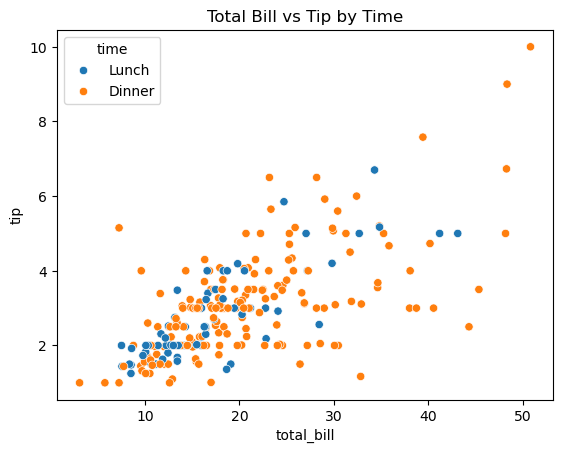

In [13]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="total_bill", y="tip", hue="time")
plt.title("Total Bill vs Tip by Time")
plt.show()